<a href="https://colab.research.google.com/github/srilakshmi-2003/DLT-LAB/blob/main/srilakshmi-2003/DLT-LAB/CNN(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

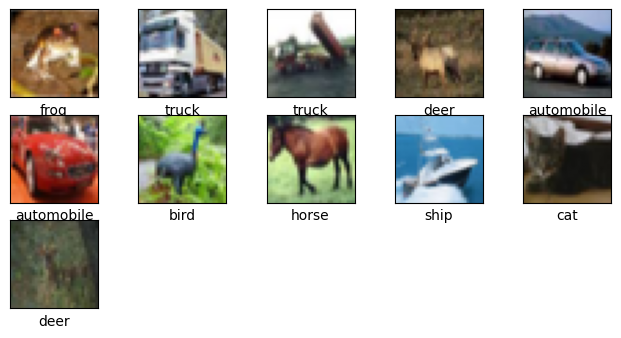

In [ ]:
plt.figure(figsize=(8,8))
for i in range(11):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3),activation='relu',
input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

Epoch 1/5
1563/1563 [==============================] - 69s 43ms/step - loss: 1.5178 - accuracy: 0.4461 - val_loss: 1.2587 - val_accuracy: 0.5522
Epoch 2/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1619 - accuracy: 0.5921 - val_loss: 1.0713 - val_accuracy: 0.6225
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 1.0129 - accuracy: 0.6450 - val_loss: 0.9856 - val_accuracy: 0.6568
Epoch 4/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9152 - accuracy: 0.6777 - val_loss: 0.9362 - val_accuracy: 0.6716
Epoch 5/5
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8428 - accuracy: 0.7049 - val_loss: 0.9251 - val_accuracy: 0.6840
313/313 - 3s - loss: 0.9251 - accuracy: 0.6840 - 3s/epoch - 10ms/step
0.6840000152587891


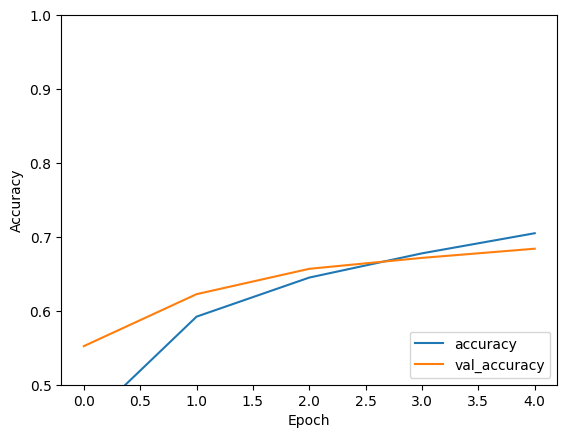

In [ ]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)